In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import math

%matplotlib inline


In [2]:
listDetail = pd.read_csv('../airbnb-open-data-in-nyc/listings_detail.csv')

/Users/ijoe/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Check data types

In [21]:
listDetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44317 entries, 0 to 44316
Data columns (total 96 columns):
id                                  44317 non-null int64
listing_url                         44317 non-null object
scrape_id                           44317 non-null int64
last_scraped                        44317 non-null object
name                                44289 non-null object
summary                             42809 non-null object
space                               29850 non-null object
description                         44292 non-null object
experiences_offered                 44317 non-null object
neighborhood_overview               25619 non-null object
notes                               16147 non-null object
transit                             27342 non-null object
access                              25361 non-null object
interaction                         24368 non-null object
house_rules                         27646 non-null object
thumbnail_url          

### Check if price attribute has null values or not

In [3]:
listDetail['price'].isnull().values.any()

False

### Convert price attribute from string to float

In [5]:
listDetail['price'] = listDetail.price.str.replace("\$|,", "").astype(float)

### Visualize our data set

Top 20  neighbourhood :


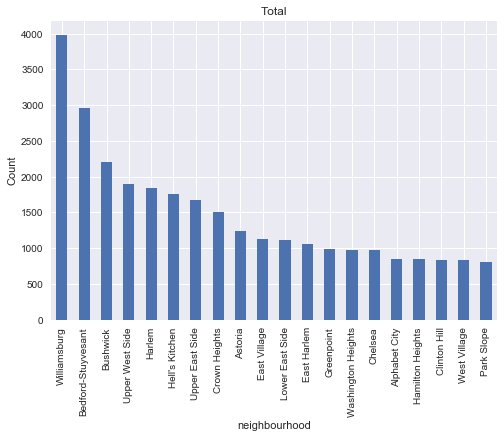

Top 20  availability_365 :


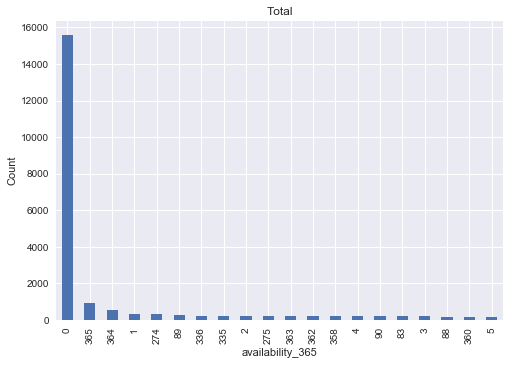

Top 20  accommodates :


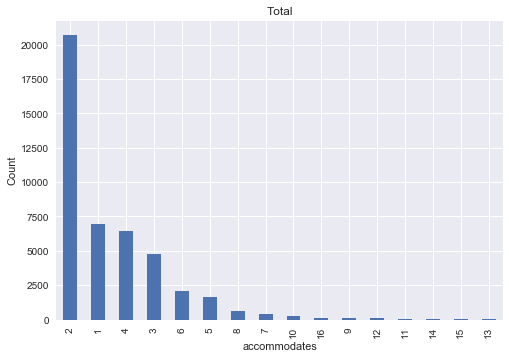

In [9]:
# cols = ["neighbourhood","host_response_rate", "host_listings_count","accommodates","bathrooms", "bedrooms", "beds", "weekly_price", "monthly_price", "cleaning_fee", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews", "review_scores_rating", "calculated_host_listings_count", "reviews_per_month"]
cols = ["neighbourhood", "availability_365", "accommodates"]
for name in cols:
    print 'Top 20 ', name,':'
#     print(listDetail[name].value_counts(),'\n')
    listDetail[name].value_counts()[:20].plot(kind='bar')
    plt.title('Total')
    plt.xlabel(name)
    plt.ylabel('Count')
    sns.despine
    plt.show()

### Plot the location of all listings based on latitute and longitude

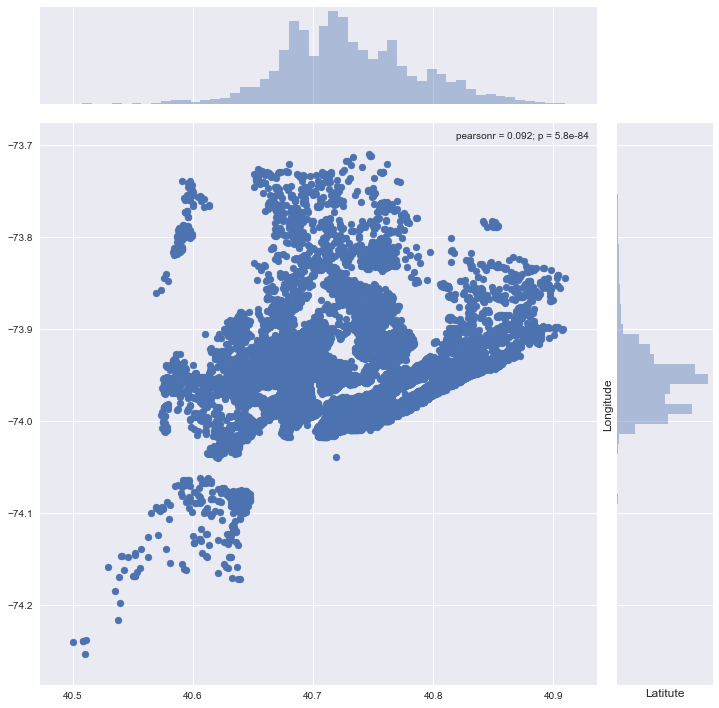

<function seaborn.utils.despine>

In [11]:
plt.figure(figsize=(10,10))
sns.jointplot(x=listDetail.latitude.values, y=listDetail.longitude.values, size=10)
plt.xlabel('Latitute', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()
sns.despine

## Better understanding of data set: What is affecting listing price?

### Number of Bedroom vs Price

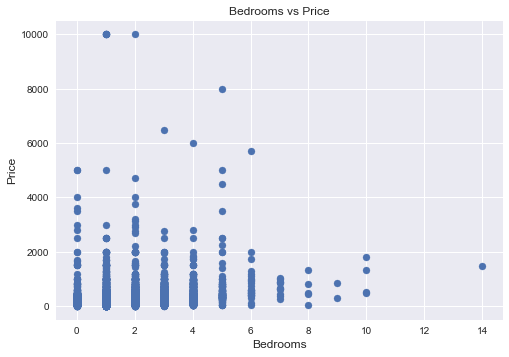

In [12]:
plt.scatter(listDetail.bedrooms, listDetail.price)
plt.title("Bedrooms vs Price")
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Number of Accommodation vs Price

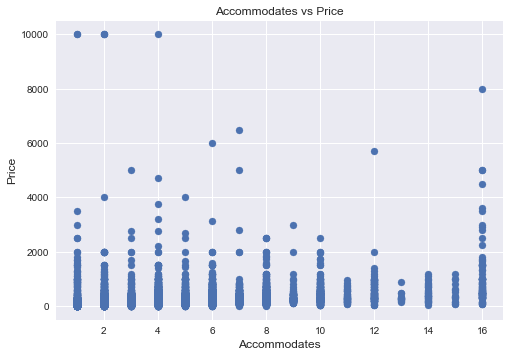

In [13]:
plt.scatter(listDetail.accommodates, listDetail.price)
plt.title("Accommodates vs Price")
plt.xlabel('Accommodates', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Number of Availability in 365 days vs Price

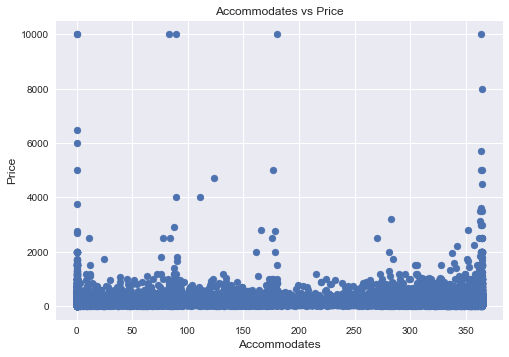

In [14]:
plt.scatter(listDetail.availability_365, listDetail.price)
plt.title("Availability 365 vs Price")
plt.xlabel('Availability 365', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Scores Rating vs Price

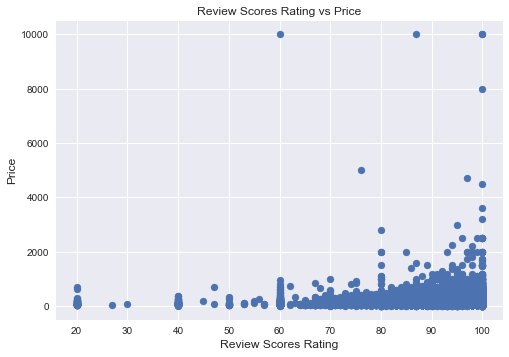

In [30]:
plt.scatter(listDetail.review_scores_rating, listDetail.price)
plt.title("Review Scores Rating vs Price")
plt.xlabel('Review Scores Rating', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Number of Reviews vs Price

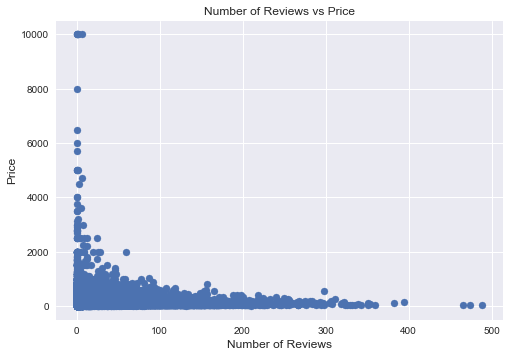

In [29]:
plt.scatter(listDetail.number_of_reviews, listDetail.price)
plt.title("Number of Reviews vs Price")
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Review Score Accuracy vs Price

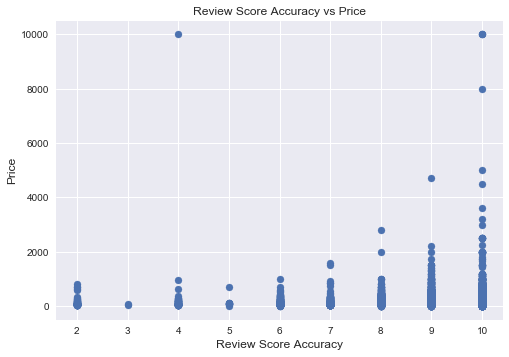

In [33]:
plt.scatter(listDetail.review_scores_accuracy, listDetail.price)
plt.title("Review Score Accuracy vs Price")
plt.xlabel('Review Score Accuracy', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Review Score Cleanliness vs Price


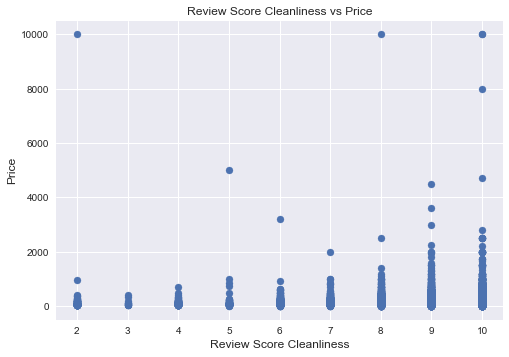

In [36]:
plt.scatter(listDetail.review_scores_cleanliness, listDetail.price)
plt.title("Review Score Cleanliness vs Price")
plt.xlabel('Review Score Cleanliness', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Review Score Check-in vs Price


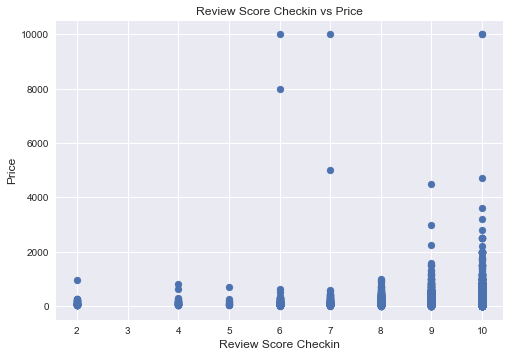

In [37]:

plt.scatter(listDetail.review_scores_checkin, listDetail.price)
plt.title("Review Score Checkin vs Price")
plt.xlabel('Review Score Checkin', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Review Score Communication vs Price


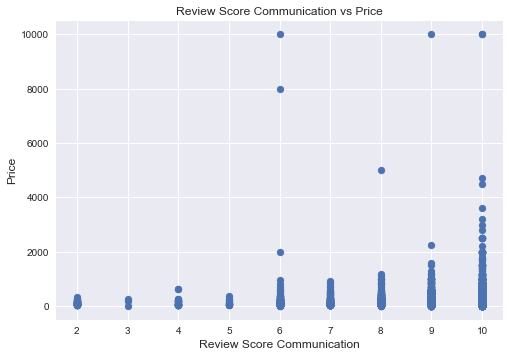

In [38]:
plt.scatter(listDetail.review_scores_communication, listDetail.price)
plt.title("Review Score Communication vs Price")
plt.xlabel('Review Score Communication', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Review Score Location vs Price


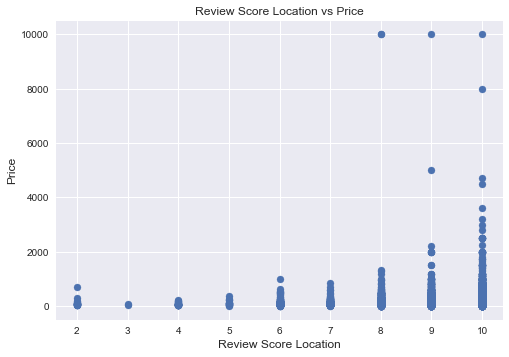

In [40]:
plt.scatter(listDetail.review_scores_location, listDetail.price)
plt.title("Review Score Location vs Price")
plt.xlabel('Review Score Location', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Review Score Location vs Price

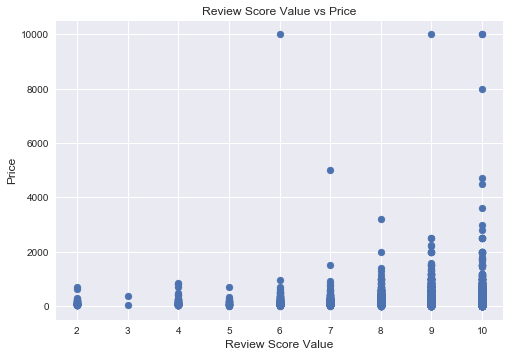

In [43]:
plt.scatter(listDetail.review_scores_value, listDetail.price)
plt.title("Review Score Value vs Price")
plt.xlabel('Review Score Value', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Reviews per Month vs Price

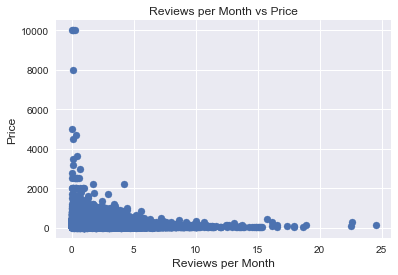

In [57]:

plt.scatter(listDetail.reviews_per_month, listDetail.price)
plt.title("Reviews per Month vs Price")
plt.xlabel('Reviews per Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Price distribution based on the Review Scores Rating

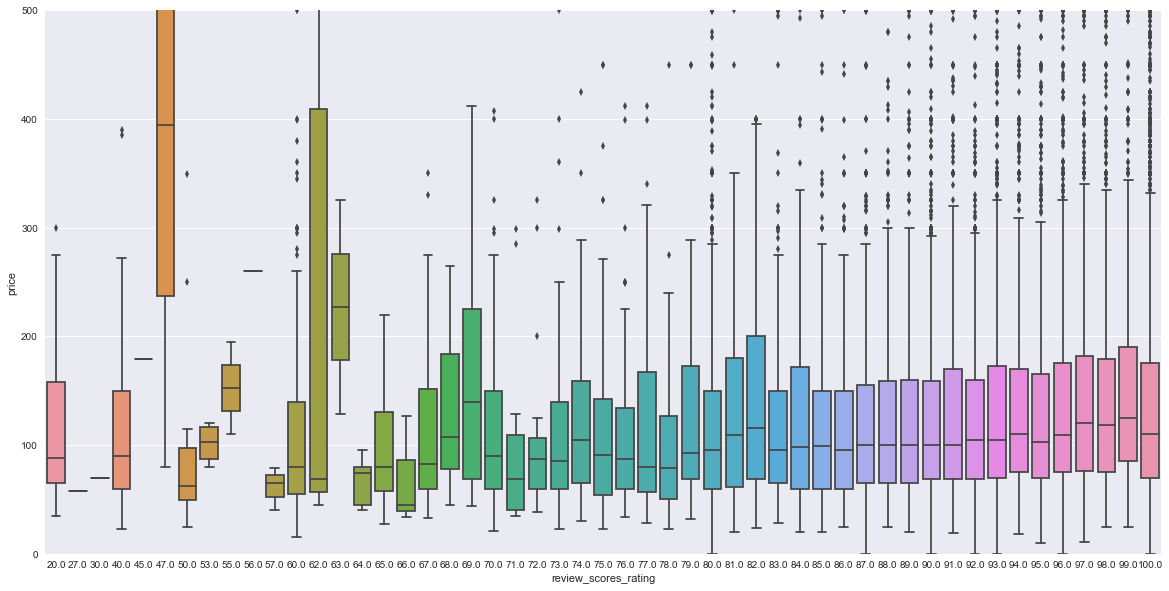

In [69]:
col = 'review_scores_rating'
data = pd.concat([listDetail['price'], listDetail[col]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=col, y="price", data=data)
fig.axis(ymin=0, ymax=500);


### Price distribution based on the Review Scores Rating

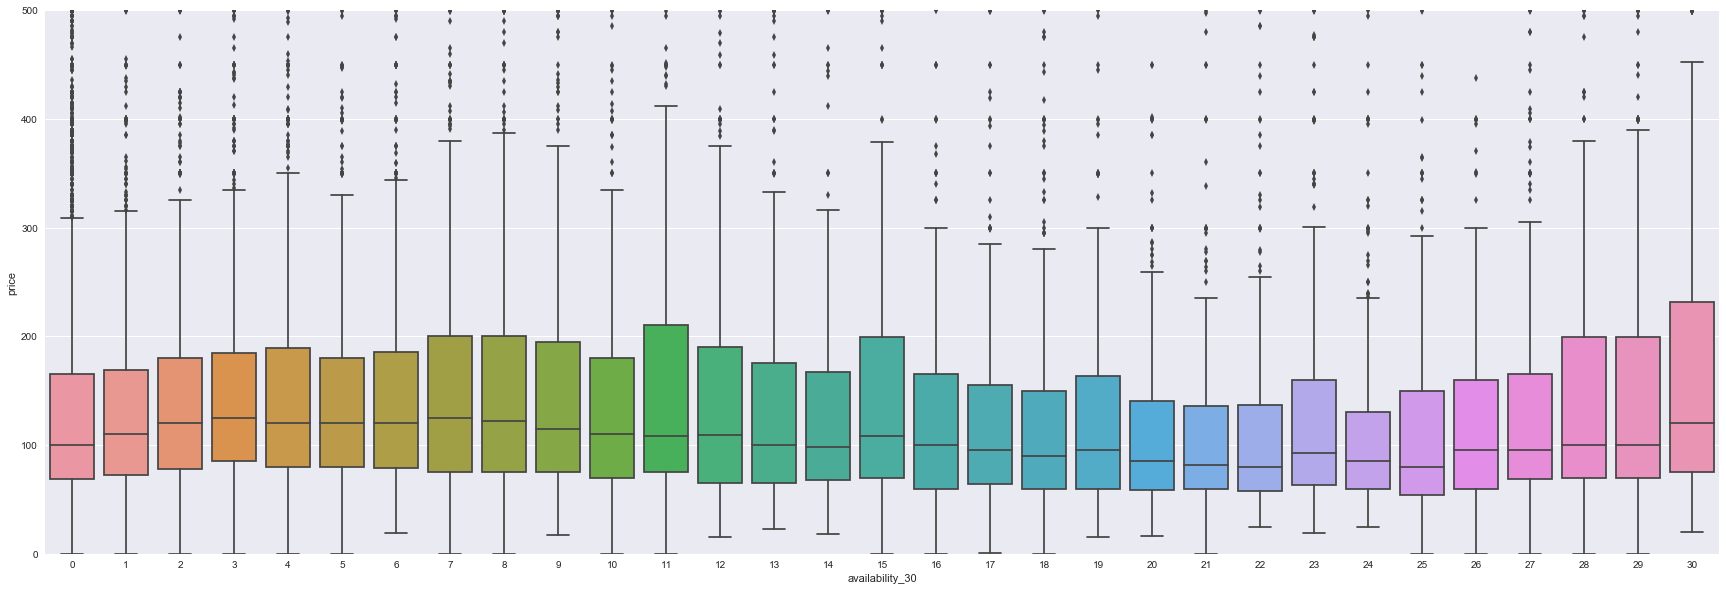

In [73]:

col = 'availability_30'
data = pd.concat([listDetail['price'], listDetail[col]], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=col, y="price", data=data)
fig.axis(ymin=0, ymax=500);


In [74]:
### Heat map

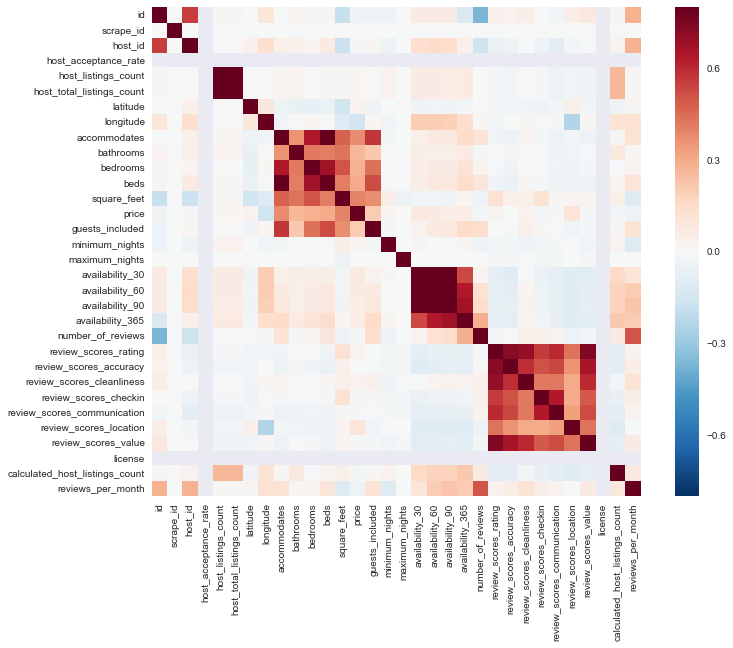

In [76]:
# Correlation Matrix Heatmap
corrmat = listDetail.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

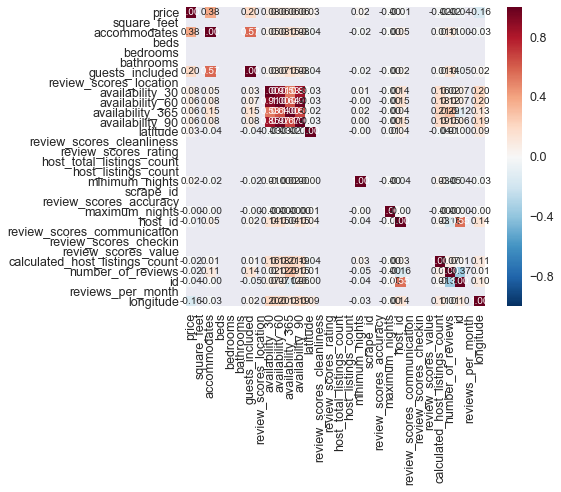

In [85]:
# Top 10 Heatmap
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
# cols = ["host_response_rate", "host_listings_count","accommodates","bathrooms", "bedrooms", "beds", "weekly_price", "monthly_price", "cleaning_fee", "guests_included", "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews", "review_scores_rating", "calculated_host_listings_count", "reviews_per_month"]

cm = np.corrcoef(listDetail[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [91]:
listDetail.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms',

### Choose which features to show in the heat map

In [95]:
cols = ["id","host_response_rate", "host_listings_count","accommodates","bathrooms", "bedrooms", "beds", "price", 
        "weekly_price", "monthly_price", "cleaning_fee", "guests_included", "extra_people", 
        "minimum_nights", "maximum_nights", "number_of_reviews",
        'availability_30', 'availability_60', 'availability_90','availability_365',
        "review_scores_rating", "calculated_host_listings_count", "reviews_per_month", "zipcode",
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'
       ]
data = listDetail[cols]


In [96]:
data.head()

,id,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,...,review_scores_rating,calculated_host_listings_count,reviews_per_month,zipcode,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,18461891,NaN,1.0,2,1.0,0.0,1.0,110.0,NaN,NaN,...,NaN,1,NaN,11105,NaN,NaN,NaN,NaN,NaN,NaN
1,20702398,100%,1.0,2,1.0,1.0,1.0,50.0,NaN,NaN,...,100.0,1,2.00,NaN,10.0,10.0,10.0,10.0,10.0,10.0
2,6627449,100%,1.0,3,1.0,1.0,1.0,125.0,$775.00,NaN,...,95.0,1,0.77,10464,10.0,10.0,10.0,10.0,10.0,10.0
3,19949243,100%,1.0,4,1.0,1.0,3.0,100.0,NaN,NaN,...,NaN,1,NaN,10464,NaN,NaN,NaN,NaN,NaN,NaN
4,1886820,NaN,1.0,4,3.0,3.0,3.0,300.0,NaN,NaN,...,NaN,1,NaN,10464,NaN,NaN,NaN,NaN,NaN,NaN


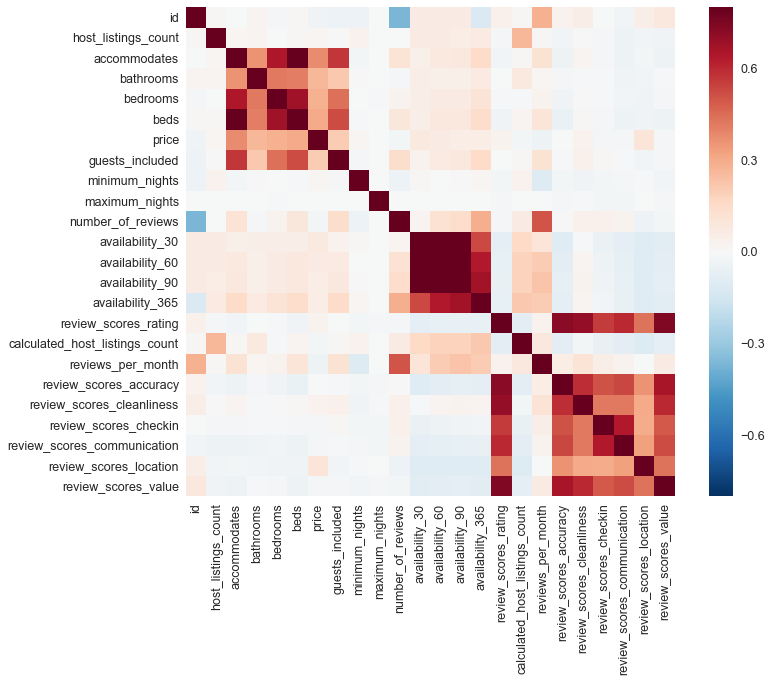

In [97]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);